<p style="text-align: center;"><font size="8"><b>Ordinary Differential Equations</b></font><br>

Differential equations are an invaluable way to model a wide range of scientific and engineering problems. 

They can describe everything from predator-prey relationships to how heat travels throughout a room to how fast a rocket moves as it burns fuel.

![lorenz equations](code/lorenz.gif)

Before we look at specific applications, we should state exactly what a differential equation is. 

A differential equation is an equation for an unknown function $y$ that contains dervivatives of $y$. We will limit ourselves to *ordinary differential equations* (ODEs) where $y$ is a function of one variable. Specifcally we will look at *initial value problems*. In this case we will be given an initial state of a variable and we will be interested in how it evolves in time.


For example, an ODE we might be interested in is:

\begin{align*}
    y'(t) &= t^2 y,\\
    y(0) &= 1.
  \end{align*}
  
The function $y$ (and its derivative $y'(t)$) are unknown, however we know how they are related. The second equation $y(0)=1$ is called the *initial condition*. We will be interested in the behavior of $y$ as a function of $t$ from $t=0$ to $t=T$. $T$ is called the *time horizon*. Every ODE must come with an initial condition (or boundary conditions) in order to have a unique solution.

To understand why, it may be helpful to look at an analytic solution of this ODE. We can write the ODE in the form:
$$ \frac{\text{d}y}{\text{d}t} = t^2 y.$$

Lets move all the terms involving $y$ to the left hand side and all the terms invovling $t$ to the right hand side.

$$ \frac{\text{d}y}{y} = t^2\text{d}t.$$

This technique is called *separation of variables* and is the simplest technique to attempt to solve an ODE. At this point we can integrate both sides:

\begin{align*}
    \int \frac{\text{d}y}{y} &= \int t^2 \text{d}t,\\
    \Rightarrow\ln |y| &= \frac{t^3}{3} + C.
\end{align*}

Where $C$ is an arbitrary constant coming from doing the indefinite integrals. Using the properties of logarithms we can solve for $y(t)$. 

$$ y(t) = Ce^{t^3/3}.$$

At this point we're almost done, however we still have an arbitrary constant as part of our solution. Here we where we make use of the initial condition to solve for $C$.

$$ y(0) = 1 \Rightarrow y(0) = 1 = Ce^{0} \Rightarrow C = 1.$$

Thus our solution to the ODE is
$$ y(t) = e^{t^3/3}.$$

In this class you will not be expected to solve ODEs analytically. In general solving ODEs in this manner is tedious, if not impossible. For example consider the ODE:

\begin{align*}
    y'(t) &= \sin(t)t^2e^{t^2},\\
    y(0) &=1.
\end{align*}

This ODE does not have an analytic solution. Thus we must turn to computers to find an approximate solution.

The general ODE takes the form:
$$\begin{align*}
    y'(t) &= f(y,t),\\
    y(0) &=a.
\end{align*}$$

There are many ways to approximate solutions to ODEs on a computer. We will look at the simplest and oldest method.

# Forward Euler

The *forward Euler method* simply replaces the derivative by a forward finite difference scheme.

Mathematically this looks like:
$$ \frac{y(t + \Delta t) - y(t)}{\Delta t} = f(y(t),t).$$

We begin by splitting our time interval $[0,T]$ into $N$ equal intervals of length $\Delta t$ to get a series of time steps $t_0, t_1, \dots, t_N$. We call $\Delta t$ the time step size.

Starting from the initial condition $Y_0 = y(0)$, we construct a sequence $Y_1, Y_2, \dots$ such that:

$$ Y_{k+1} = Y_k + \Delta t f(Y_k, k\Delta t).$$

Note that $Y_k \approx y(k\Delta t)$. We have essentially turned our ODE into a reccurence relation.

For example, let's look at the ODE:
$$\begin{align*}
    y'(t) &= y\sin(t)t^2 e^{-t^2}\\
    y(0) &= 1
\end{align*}$$

So we have $Y_0 = y(0) = 1$. We can construct $Y_1$:
$$ Y_1 = Y_0 + \Delta t Y_0\sin(t_0)t_0^2 e^{-t_0^2}.$$

From $Y_1$ we can construct $Y_2$ and so on...

An implementation would look like this:

In [7]:
import numpy as np

# define time horizon and number of intervals
T = 10
N = 100
dt = T/N

t = np.linspace(0,T,N+1)
y0 = 1

# construct a list to contain y values at each time step, append initial condition
y = []
y.append(y0)

for i in range(1,N+1):
    y.append(y[i-1] + dt*(y[i-1]*np.sin(t[i-1])*t[i-1]**2*np.exp(-t[i-1]**2)))


We can plot $y(t)$.

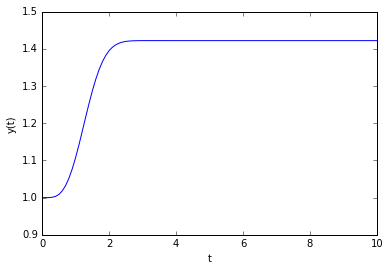

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(t,y)
plt.xlabel("t")
plt.ylabel("y(t)")

## Exercise

Use forward Euler to evaluate the ODE:
$$\begin{align*}
    y'(t) &= \cos(y t)\\
    y(0) &= 0
\end{align*}$$

for $t$ between 0 and 5. Use $\Delta t=0.1$.

# Systems of ODEs

Consider the system of ODEs:
$$\begin{align*}
    x'(t) &= \frac{2}{3}x - \frac{4}{3}xy\\
    y'(t) &= xy - y\\
    x(0) &= a, \qquad y(0) = b
\end{align*}$$

This is called the *Lotka-Volerra equations*. They are used to model predator-prey relations. We call $x$ the number of prey (e.g. rabbits) and $y$ the number or predators (e.g. foxes).

Applying forward Euler to a system of equations is no different than applying it to a single equation. We just now have two lists we have to keep track of: one for x and another for y.

In [63]:
# define time horizon and number of intervals
T = 50
N = 50000
dt = T/N

t = np.linspace(0,T,N+1)
x0 = 1
y0 = 1

# constructs a list to contain x and y values at each time step, append initial condition
x = []
y = []
x.append(x0)
y.append(y0)

for i in range(1,N+1):
    x.append(x[i-1] + dt*(2/3*x[i-1] - 4/3*x[i-1]*y[i-1]))
    y.append(y[i-1] + dt*(x[i-1]*y[i-1] - y[i-1]))
    


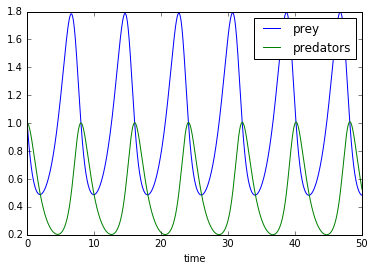

In [64]:
plt.plot(t,x)
plt.plot(t,y)
plt.xlabel("time")
plt.legend(["prey","predators"])

*Phase plots* plot the variables in the system against each other. 

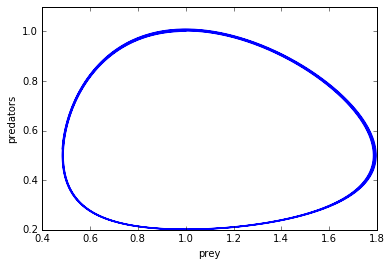

In [65]:
plt.plot(x,y)
plt.xlabel("prey")
plt.ylabel("predators")

Once we have the data for x and y, we can create an animation as we saw last class.

In [80]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc

# configure matplotlib animations to display in notebook
rc('animation', html='html5')
%matplotlib

# initialize plot
fig, ax = plt.subplots()
ax.set_xlim((min(x) - 0.1, max(x) + 0.1))
ax.set_ylim((min(y) - 0.1, max(y) + 0.1))
ax.set_aspect('equal')
ax.set_xlabel("prey")
ax.set_ylabel("predators")

data_line, = ax.plot(x[0],y[0], 'b') # solid blue line for past values
data_point, = ax.plot(x[0],y[0], 'ro') # red dot for current value


# define update function
def update_frame(i, x, y, t):
    data_line.set_data(x[:i+1], y[:i+1])
    data_point.set_data(x[i], y[i])
    ax.set_title("Time %3.2f"%t[i])

anim = FuncAnimation(fig, update_frame, frames = np.arange(0,N,500), fargs=(x,y,t))

Using matplotlib backend: Qt4Agg


In [81]:
anim

## Exercise

Use forward Euler to evaulate the following system of ODEs:
$$\begin{align*}
    x'(t) &= x(1.5 - x - 0.5y)\\
    y'(t) &= y(2 - y -0.75x)\\
    x(0) &= 1,\qquad y(0)=1
\end{align*}$$
for $t$ between 0 and 30, and $\Delta t=0.01$.

# Forward Euler as a function

We would like to code up forward Euler as a function. Ideally this function would be able to evaluate any ODE. It would need to take in as parameters:
* $f(y,t)$
* $y_0$
* $T$
* $\Delta t$ or $N$

The first step to generalizing our code is to look at what we are trying to do. The forward Euler method starts from an initial condition $y_0$ and from that generates $y_1$. From $y_2$ it generates $y_3$ and so on up until $y_N$. The method to generate a new $y$ from an old one is always the same. This could be encapsilated in a function `forward_euler_step()`.

In [35]:
def forward_euler_step(f, y, t, dt):

    return y + dt*f(y,t)


The `forward_euler()` function then simply loops over all the time steps and appends the result of `forward_euler_step()` to a list.

In [44]:
def forward_euler(f, y0, T, N):
    
    # split time into intervals
    t = np.linspace(0,T,N+1)
    dt = T/N
    
    y = []
    y.append(y0)
    
    for i in range(1,N+1):

        y.append(forward_euler_step(f, y[i-1], t[i-1], dt))
        
    return (t,y)

Consider an example from earlier.

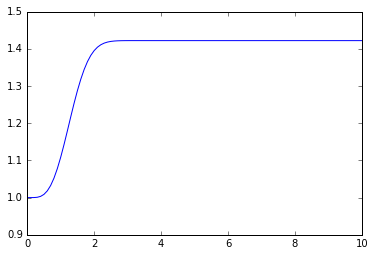

In [45]:
f = lambda y,t : y*np.sin(t)*t**2*np.exp(-t**2)
y0 = 1
T = 10
N = 100

(t,y) = forward_euler(f, y0, T, N)

plt.plot(t,y)

What about systems? 

It turns out that if we define `f` properly our forward Euler code can handle systems without any modifications!

The function `f` still needs to take is two parameters, `y` and `t`. Note that `y` does not have to be a scalar, nor does `f` have to return a scalar. 

Let's assume that `y` is an array, i.e. `y[0]` is x, `y[1]` is y etc. We will also return an array corresponding to the right hand sides of ODE.

Let's look at another example from earlier.

In [ ]:
f = lambda y,t : np.array([2/3*y[0] - 4/3*y[0]*y[1], y[0]*y[1] - y[1]])
y0 = np.array([1,1]) #initial condition is also an array
T = 50
N = 50000

(t,y) = forward_euler(f, y0, T, N)

The only problem here is that `y` is actually a list of arrays. In order to plot everything, we'd like `y` to be a two-dimensional array. 

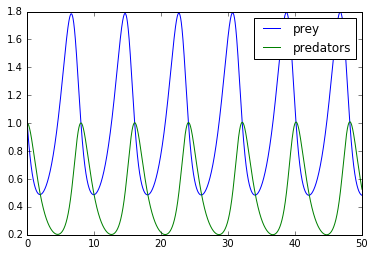

In [53]:
y = np.asarray(y)
plt.plot(t,y[:,0])
plt.plot(t,y[:,1])
plt.legend(["prey", "predators"])

## Exercise

The Lorenz equations are given by:
$$\begin{align*}
x'(t) &= \sigma (y - x)\\
y'(t) &= x(\rho - z) - y\\
z'(t) &= xy - \beta z
\end{align*}$$
where $\sigma$, $\rho$ and $\beta$ are constants. 

Using the code above, solve the Lorenz equations from $t=0$ to $t=100$ with $N=10000$, starting from $x_0=0$, $y_0=1$ and $z_0=1$. Take $\sigma=10$, $\beta=8/3$ and $\rho=28$.

Do a phase plot of $x$ vs $z$.